In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix

In [3]:
# the digits dataset of 8x8 pixels image of digit
digits = datasets.load_digits()
dimention = digits.images[0].shape
n_samples=len(digits.images)
print("The number of samples in digits dataset is {0:d}, the dimenrtion of each images is {1:d}x{1:d}".format(n_samples,dimention[0]))

The number of samples in digits dataset is 1797, the dimenrtion of each images is 8x8


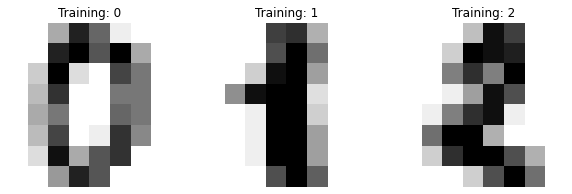

In [5]:
#show the first 3 images
_, fig=plt.subplots(nrows=1, ncols=3, figsize=(10,10))
for ax, image, label in zip(fig, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title("Training: %i"%label)

In [6]:
# reshape the images into a vetor Nx1
data = digits.images.reshape((n_samples,-1))
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.20, random_state=42)

In [20]:
# define and train the model [MLP] using the training subset

model = MLPClassifier(solver="adam", hidden_layer_sizes=(10,12,20), random_state=1, max_iter=600)
model.fit(x_train,y_train)

# Using the trained model to predict the label for the testing data 
classification_results = model.predict(x_test)


In [21]:
print(metrics.classification_report(y_test,classification_results))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        33
           1       0.83      0.86      0.84        28
           2       0.88      0.85      0.86        33
           3       0.85      0.85      0.85        34
           4       1.00      1.00      1.00        46
           5       0.94      0.94      0.94        47
           6       0.92      0.97      0.94        35
           7       1.00      0.94      0.97        34
           8       0.76      0.83      0.79        30
           9       0.85      0.82      0.84        40

    accuracy                           0.90       360
   macro avg       0.90      0.90      0.90       360
weighted avg       0.90      0.90      0.90       360



Confusion matrix, without normalization
[[30  0  0  1  0  0  1  0  0  1]
 [ 0 24  2  0  0  0  0  0  1  1]
 [ 0  1 28  1  0  1  1  0  1  0]
 [ 0  0  0 29  0  1  0  0  4  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  2  0  0 44  1  0  0  0]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  1  0  0  0 32  0  1]
 [ 0  2  0  0  0  0  0  0 25  3]
 [ 0  2  0  2  0  1  0  0  2 33]]


/Users/carlos-theran/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

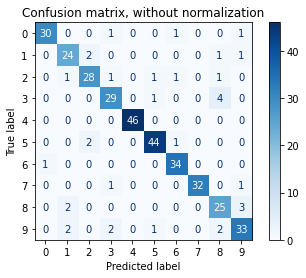

In [23]:
title_option = [("Confusion matrix, without normalization", None)]

for title, normalize in title_option:

    disp =plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show

In [25]:
print(classification_results)
print(y_test)

[6 9 3 7 2 1 5 2 5 3 2 8 4 0 4 2 3 7 8 8 4 3 9 7 2 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 3 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 2 5 9 9 0 2 5 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 8 5 9 4 2 7
 7 4 4 1 9 8 3 9 7 2 6 9 4 6 7 5 7 5 8 7 5 7 9 0 6 6 4 2 8 0 9 4 6 9 9 6 8
 0 8 5 6 6 0 6 4 3 5 3 1 7 2 3 0 4 5 8 6 5 1 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 1 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 9 8 5 5 1 0 1 8 9 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 3 7 7 0 1 9 4 5 8 5 3 6 0 4 1 0 0 8 6 5 9 7 3 5 5 9 9 8 5 3 3 6 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 2 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 6 0 6 2 0 7 9 1 9 5 2 7 7 9 8 7 4 3 8 3 5]
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7